In [138]:
# Import pandas into the environment
import pandas as pd

# Import marketing.csv 
marketing = pd.read_csv('marketing.csv')

In [139]:
# Print the first five rows of the DataFrame
print(marketing.head(5))

      user_id date_served marketing_channel          variant converted  \
0  a100000029      1/1/18         House Ads  personalization      True   
1  a100000030      1/1/18         House Ads  personalization      True   
2  a100000031      1/1/18         House Ads  personalization      True   
3  a100000032      1/1/18         House Ads  personalization      True   
4  a100000033      1/1/18         House Ads  personalization      True   

  language_displayed language_preferred    age_group date_subscribed  \
0            English            English   0-18 years          1/1/18   
1            English            English  19-24 years          1/1/18   
2            English            English  24-30 years          1/1/18   
3            English            English  30-36 years          1/1/18   
4            English            English  36-45 years          1/1/18   

  date_canceled subscribing_channel is_retained  
0           NaN           House Ads        True  
1           NaN       

In [140]:
# Check column data types and non-missing values
print(marketing.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10037 entries, 0 to 10036
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   user_id              10037 non-null  object
 1   date_served          10021 non-null  object
 2   marketing_channel    10022 non-null  object
 3   variant              10037 non-null  object
 4   converted            10022 non-null  object
 5   language_displayed   10037 non-null  object
 6   language_preferred   10037 non-null  object
 7   age_group            10037 non-null  object
 8   date_subscribed      1856 non-null   object
 9   date_canceled        577 non-null    object
 10  subscribing_channel  1856 non-null   object
 11  is_retained          1856 non-null   object
dtypes: object(12)
memory usage: 941.1+ KB
None


In [141]:
# Check the data type of is_retained
print(marketing['is_retained'].dtype)

object


In [142]:
# Convert is_retained to a boolean
marketing['is_retained'] = marketing['is_retained'].astype('bool')

# Check the data type of is_retained, again
print(marketing['is_retained'].dtypes)

bool


##### Adding new columns that derive information from existing data or based on domain knowledge is known as Feature Engineering. Even in relatively simple datasets, there are always new characteristics you could pull out to create a more in-depth analysis.

In [143]:
# Mapping for channels
channel_dict = {"House Ads": 1, "Instagram": 2, 
                "Facebook": 3, "Email": 4, "Push": 5}

# Map the channel to a channel code
marketing['channel_code'] = marketing['subscribing_channel'].map(channel_dict)

In [144]:
marketing

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained,channel_code
0,a100000029,1/1/18,House Ads,personalization,True,English,English,0-18 years,1/1/18,NaN,House Ads,True,1.0
1,a100000030,1/1/18,House Ads,personalization,True,English,English,19-24 years,1/1/18,NaN,House Ads,True,1.0
2,a100000031,1/1/18,House Ads,personalization,True,English,English,24-30 years,1/1/18,NaN,House Ads,True,1.0
3,a100000032,1/1/18,House Ads,personalization,True,English,English,30-36 years,1/1/18,NaN,House Ads,True,1.0
4,a100000033,1/1/18,House Ads,personalization,True,English,English,36-45 years,1/1/18,NaN,House Ads,True,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10032,a100007290,1/17/18,Email,control,True,German,German,45-55 years,1/17/18,1/24/18,Email,False,4.0
10033,a100007291,1/17/18,Email,control,True,German,German,55+ years,1/17/18,NaN,Email,True,4.0
10034,a100007292,1/5/18,Instagram,control,False,German,German,55+ years,1/17/18,NaN,Email,True,4.0
10035,a100007293,1/17/18,Email,control,True,German,German,0-18 years,1/17/18,NaN,Email,True,4.0


In [145]:
# Import numpy
import numpy as np

# Add the new column is_correct_lang , we can use True and False too inplace of yes and no.
marketing['is_correct_lang'] = np.where(marketing['language_preferred']==marketing['language_displayed'], 'Yes', 'No')

In [146]:
marketing

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained,channel_code,is_correct_lang
0,a100000029,1/1/18,House Ads,personalization,True,English,English,0-18 years,1/1/18,NaN,House Ads,True,1.0,Yes
1,a100000030,1/1/18,House Ads,personalization,True,English,English,19-24 years,1/1/18,NaN,House Ads,True,1.0,Yes
2,a100000031,1/1/18,House Ads,personalization,True,English,English,24-30 years,1/1/18,NaN,House Ads,True,1.0,Yes
3,a100000032,1/1/18,House Ads,personalization,True,English,English,30-36 years,1/1/18,NaN,House Ads,True,1.0,Yes
4,a100000033,1/1/18,House Ads,personalization,True,English,English,36-45 years,1/1/18,NaN,House Ads,True,1.0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10032,a100007290,1/17/18,Email,control,True,German,German,45-55 years,1/17/18,1/24/18,Email,False,4.0,Yes
10033,a100007291,1/17/18,Email,control,True,German,German,55+ years,1/17/18,NaN,Email,True,4.0,Yes
10034,a100007292,1/5/18,Instagram,control,False,German,German,55+ years,1/17/18,NaN,Email,True,4.0,Yes
10035,a100007293,1/17/18,Email,control,True,German,German,0-18 years,1/17/18,NaN,Email,True,4.0,Yes


In [147]:
# Import pandas into the environment
import pandas as pd

# Import marketing.csv with date columns
marketing = pd.read_csv('marketing.csv', parse_dates=['date_served','date_subscribed','date_canceled'])

# Add a DoW column so, in dayofweek 0 means monday, 1 means tueday and so on...

marketing['DoW'] = marketing['date_subscribed'].dt.dayofweek

C:\Users\GS\AppData\Local\Temp\ipykernel_8848\3171314663.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  marketing = pd.read_csv('marketing.csv', parse_dates=['date_served','date_subscribed','date_canceled'])
C:\Users\GS\AppData\Local\Temp\ipykernel_8848\3171314663.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  marketing = pd.read_csv('marketing.csv', parse_dates=['date_served','date_subscribed','date_canceled'])
C:\Users\GS\AppData\Local\Temp\ipykernel_8848\3171314663.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  marketing = pd.read_csv('marketing.csv', pars

In [148]:
marketing

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained,DoW
0,a100000029,2018-01-01,House Ads,personalization,True,English,English,0-18 years,2018-01-01,NaT,House Ads,True,0.0
1,a100000030,2018-01-01,House Ads,personalization,True,English,English,19-24 years,2018-01-01,NaT,House Ads,True,0.0
2,a100000031,2018-01-01,House Ads,personalization,True,English,English,24-30 years,2018-01-01,NaT,House Ads,True,0.0
3,a100000032,2018-01-01,House Ads,personalization,True,English,English,30-36 years,2018-01-01,NaT,House Ads,True,0.0
4,a100000033,2018-01-01,House Ads,personalization,True,English,English,36-45 years,2018-01-01,NaT,House Ads,True,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10032,a100007290,2018-01-17,Email,control,True,German,German,45-55 years,2018-01-17,2018-01-24,Email,False,2.0
10033,a100007291,2018-01-17,Email,control,True,German,German,55+ years,2018-01-17,NaT,Email,True,2.0
10034,a100007292,2018-01-05,Instagram,control,False,German,German,55+ years,2018-01-17,NaT,Email,True,2.0
10035,a100007293,2018-01-17,Email,control,True,German,German,0-18 years,2018-01-17,NaT,Email,True,2.0


In [149]:
# Group by date_served and count number of unique user_id's
daily_users = marketing.groupby(['date_served'])['user_id'].nunique()

# Print head of daily_users
print(daily_users.head())

date_served
2018-01-01    362
2018-01-02    374
2018-01-03    348
2018-01-04    323
2018-01-05    319
Name: user_id, dtype: int64


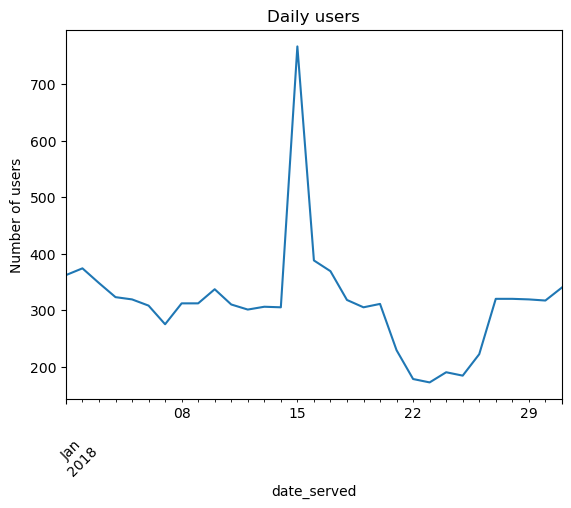

In [150]:
# Import the libraries

import matplotlib.pyplot as plt
# plt.figure(figsize=(12,8))
# Plot daily_subscribers
daily_users.plot()

# Include a title and y-axis label


plt.title('Daily users')
plt.ylabel('Number of users')

# Rotate the x-axis labels by 45 degrees
plt.xticks(rotation = 45)

# Display the plot
plt.show()

In [151]:
# Calculate the number of people we marketed to
total = marketing['user_id'].nunique()

# Calculate the number of people who subscribed
subscribers = marketing[marketing['converted']== True]['user_id'].nunique()

# Calculate the conversion rate
conversion_rate = subscribers/total
print(round(conversion_rate*100, 2), "%")

13.89 %


In [152]:
# Calculate the number of subscribers
total_subscribers = marketing[marketing["converted"] == True]\
                            ['user_id'].nunique()

# Calculate the number of people who remained subscribed
retained = marketing[marketing['is_retained'] == True]\
                   ['user_id'].nunique()

# Calculate the retention rate
retention_rate = retained/total_subscribers
print(round(retention_rate*100, 2), "%")

66.8 %


In [153]:
english_speakers = marketing[marketing['language_displayed'] == 'English']
english_speakers

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained,DoW
0,a100000029,2018-01-01,House Ads,personalization,True,English,English,0-18 years,2018-01-01,NaT,House Ads,True,0.0
1,a100000030,2018-01-01,House Ads,personalization,True,English,English,19-24 years,2018-01-01,NaT,House Ads,True,0.0
2,a100000031,2018-01-01,House Ads,personalization,True,English,English,24-30 years,2018-01-01,NaT,House Ads,True,0.0
3,a100000032,2018-01-01,House Ads,personalization,True,English,English,30-36 years,2018-01-01,NaT,House Ads,True,0.0
4,a100000033,2018-01-01,House Ads,personalization,True,English,English,36-45 years,2018-01-01,NaT,House Ads,True,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9991,a100007249,2018-01-04,House Ads,control,False,English,English,45-55 years,NaT,NaT,NaN,NaN,NaN
9992,a100007250,2018-01-05,Facebook,control,False,English,English,55+ years,NaT,NaT,NaN,NaN,NaN
9993,a100007251,2018-01-06,Instagram,control,False,English,English,0-18 years,NaT,NaT,NaN,NaN,NaN
9994,a100007252,2018-01-07,House Ads,control,False,English,Spanish,19-24 years,NaT,NaT,NaN,NaN,NaN


In [154]:
# Isolate english speakers
english_speakers = marketing[marketing['language_displayed'] == 'English']

# Calculate the total number of English speaking users
total = english_speakers['user_id'].nunique()

# Calculate the number of English speakers who converted
subscribers = english_speakers[english_speakers['converted']== True]['user_id'].nunique()

# Calculate conversion rate
conversion_rate = subscribers/total
print('English speaker conversion rate:', round(conversion_rate*100,2), '%')

English speaker conversion rate: 12.92 %


In [155]:
# Group by language_displayed and count unique users
total = marketing.groupby(['language_displayed'])['user_id'].nunique()

# Group by language_displayed and count unique conversions
subscribers = marketing[marketing['converted']==True].groupby(['language_displayed'])['user_id'].nunique()

# Calculate the conversion rate for all languages
language_conversion_rate= subscribers/total

print(round(language_conversion_rate*100,2),'%')

language_displayed
Arabic     50.00
English    12.92
German     71.62
Spanish    20.00
Name: user_id, dtype: float64 %


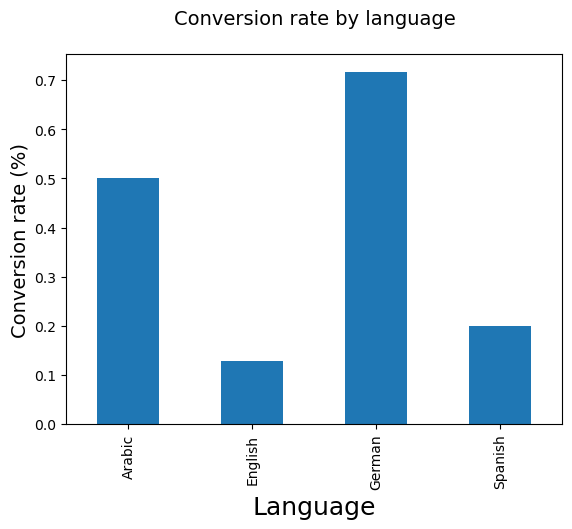

In [156]:
# Create a bar chart using language_conversion_rate DataFrame
language_conversion_rate.plot(kind= 'bar')

# Add a title and x and y-axis labels
plt.title('Conversion rate by language\n', size = 14)
plt.xlabel('Language', size = 18)
plt.ylabel('Conversion rate (%)', size = 14)

# Display the plot
plt.show()

Setting up our data to visualize daily conversion When you want to understand how your campaign performed, it is essential to 
look at how key metrics changed throughout the  campaign. Your key metrics can help you catch problems that may have happened 
during the campaign, such as a bug in the  checkout system that led to a dip in conversion toward the end of your campaign. 
Metrics over time can also surface trends  like gaining more subscribers over the weekends or on specific holidays.


In [157]:
# Group by date_served and count unique users
total = marketing.groupby(['date_served'])['user_id'].nunique()

# Group by date_served and count unique converted users
subscribers = marketing[marketing['converted']== True].groupby(['date_served'])['user_id'].nunique()

# Calculate the conversion rate per day
daily_conversion_rate = subscribers/total
print(daily_conversion_rate*100)

date_served
2018-01-01     9.944751
2018-01-02     9.893048
2018-01-03    10.344828
2018-01-04    10.835913
2018-01-05    12.539185
2018-01-06    11.363636
2018-01-07    14.181818
2018-01-08    11.538462
2018-01-09    12.500000
2018-01-10    11.869436
2018-01-11     8.064516
2018-01-12     7.641196
2018-01-13     8.496732
2018-01-14     8.524590
2018-01-15    11.342894
2018-01-16    25.515464
2018-01-17    21.951220
2018-01-18     9.119497
2018-01-19     5.901639
2018-01-20     6.752412
2018-01-21     8.733624
2018-01-22    12.359551
2018-01-23    12.209302
2018-01-24    11.578947
2018-01-25    12.500000
2018-01-26     9.009009
2018-01-27     6.562500
2018-01-28     6.250000
2018-01-29     5.956113
2018-01-30     6.624606
2018-01-31     5.294118
Name: user_id, dtype: float64


In [158]:
# Reset index to turn the results into a DataFrame
daily_conversion_rate = pd.DataFrame(daily_conversion_rate.reset_index())

# Rename columns
daily_conversion_rate.columns = ['date_served', 
                              'conversion_rate']

(0.0, 0.26526531231049116)

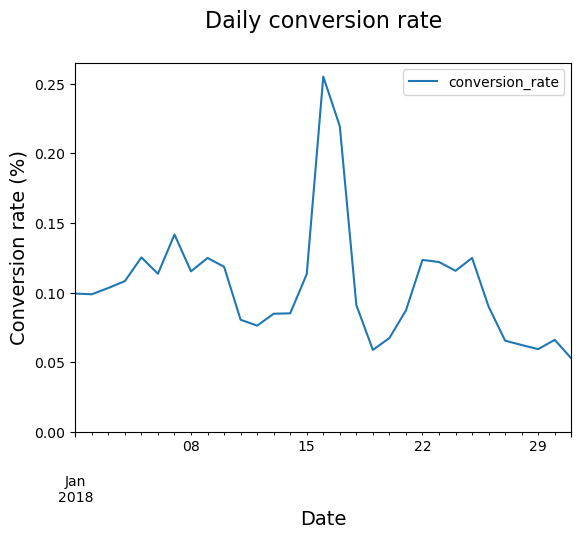

In [159]:
# Create a line chart using daily_conversion_rate DataFrame
daily_conversion_rate.plot('date_served', 
                           'conversion_rate')

plt.title('Daily conversion rate\n', size = 16)
plt.ylabel('Conversion rate (%)', size = 14)
plt.xlabel('Date', size = 14)

# Set the y-axis to begin at 0
plt.ylim(0)


###Creating daily conversion rate DataFrame To understand trends over time, we will create a new DataFrame that includes 
the conversion rate each day. we will follow essentially the same steps as before when we calculated the overall 
conversion rate, this time also grouping by the date a user subscribed. Looking at the daily conversion rate is 
crucial to contextualize whether the conversion rate on a particular day was good or bad. Additionally, looking at 
conversion rate over time can help to surface trends such as a conversion rate that appears to be going down over time. 
These kinds of trends are crucial to identify for our marketing stakeholders as early as possible.

Marketing channels across age groups
Some marketing stakeholders want to know if their marketing channels are reaching all users equally or if some marketing channels are serving specific age demographics.

Within a marketing team, it is common to get requests that require quick analysis and visualization. The better you are at visualizing the results, the more likely that you will effectively communicate your findings to your stakeholders.

C:\Users\GS\AppData\Local\Temp\ipykernel_8848\2660237641.py:12: MatplotlibDeprecationWarning: Passing the emit parameter of set_ylim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.ylim(0,800,50)


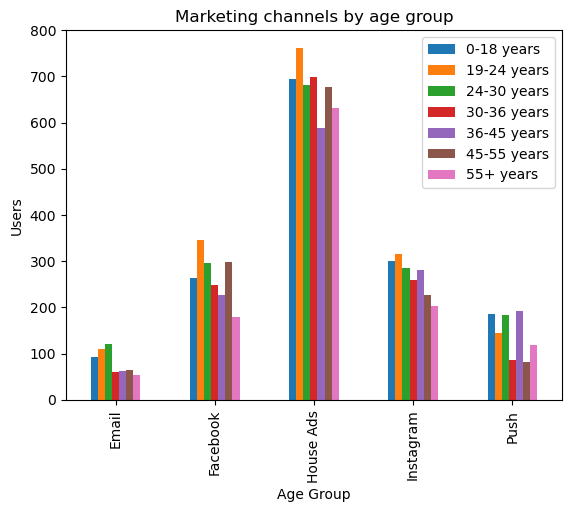

In [160]:
channel_age = marketing.groupby(['marketing_channel', 'age_group'])\
                                ['user_id'].count()

# Unstack channel_age and transform it into a DataFrame
channel_age_df = pd.DataFrame(channel_age.unstack(level = 1))

# Plot the results
channel_age_df.plot(kind = 'bar')
plt.title('Marketing channels by age group')
plt.xlabel('Age Group')
plt.ylabel('Users')
plt.ylim(0,800,50)
# Add a legend to the plot
plt.legend(loc = 'upper right', 
           labels = channel_age_df.columns.values)
plt.show()

In [161]:
# Count the subs by subscribing channel and day
retention_total = marketing.groupby(['date_subscribed',
                                'subscribing_channel'])['user_id'].nunique()

# Print results
print(retention_total.head(10))

date_subscribed  subscribing_channel
2018-01-01       Email                   1
                 Facebook                8
                 House Ads              16
                 Instagram               8
                 Push                    3
2018-01-02       Email                   4
                 Facebook                6
                 House Ads              17
                 Instagram               8
                 Push                    2
Name: user_id, dtype: int64


In [162]:
# Count the retained subs by subscribing channel and date subscribed
retention_subs = marketing[marketing['is_retained'] == True]\
                           .groupby(['date_subscribed',
                                     'subscribing_channel'])\
                            ['user_id'].nunique()

# Print results
print(retention_subs.head(20))

date_subscribed  subscribing_channel
2018-01-01       Email                   1
                 Facebook                7
                 House Ads              11
                 Instagram               6
                 Push                    3
2018-01-02       Email                   3
                 Facebook                6
                 House Ads              10
                 Instagram               5
                 Push                    2
2018-01-03       Facebook                4
                 House Ads              11
                 Instagram              10
                 Push                    2
2018-01-04       Email                   1
                 Facebook                6
                 House Ads               7
                 Instagram               4
2018-01-05       Email                   1
                 Facebook                4
Name: user_id, dtype: int64


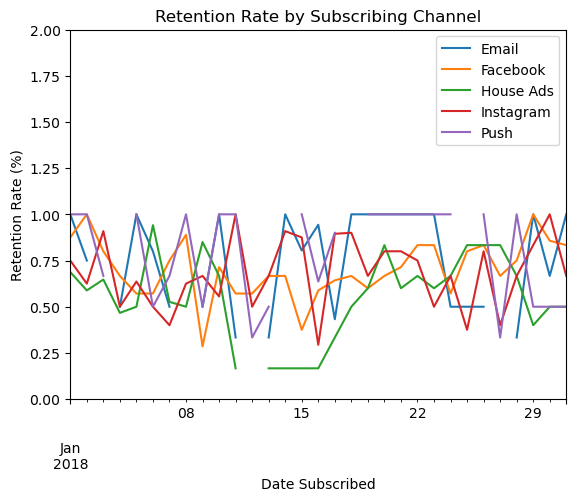

In [163]:
# Divide retained subscribers by total subscribers
retention_rate = retention_subs/retention_total
retention_rate_df = pd.DataFrame(retention_rate.unstack(level=1))

# Plot retention rate
retention_rate_df.plot()

# Add a title, x-label, y-label, legend and display the plot
plt.title('Retention Rate by Subscribing Channel')
plt.xlabel('Date Subscribed')
plt.ylabel('Retention Rate (%)')
plt.ylim(0,2)
plt.legend(loc = 'upper right', labels=retention_rate_df.columns.values )
plt.show()

In [164]:
def conversion_rate(dataframe, column_names):
    # Total number of converted users
    column_conv = dataframe[dataframe['converted'] == True]\
                       .groupby(column_names)['user_id'].nunique()

    # Total number users
    column_total = dataframe.groupby(column_names)['user_id'].nunique()   
    
    # Conversion rate 
    conversion_rate = column_conv/column_total
    
    # Fill missing values with 0
    conversion_rate = conversion_rate.fillna(0)
    return conversion_rate

In [165]:
conversion_rate(marketing,['date_served'] )

date_served
2018-01-01    0.099448
2018-01-02    0.098930
2018-01-03    0.103448
2018-01-04    0.108359
2018-01-05    0.125392
2018-01-06    0.113636
2018-01-07    0.141818
2018-01-08    0.115385
2018-01-09    0.125000
2018-01-10    0.118694
2018-01-11    0.080645
2018-01-12    0.076412
2018-01-13    0.084967
2018-01-14    0.085246
2018-01-15    0.113429
2018-01-16    0.255155
2018-01-17    0.219512
2018-01-18    0.091195
2018-01-19    0.059016
2018-01-20    0.067524
2018-01-21    0.087336
2018-01-22    0.123596
2018-01-23    0.122093
2018-01-24    0.115789
2018-01-25    0.125000
2018-01-26    0.090090
2018-01-27    0.065625
2018-01-28    0.062500
2018-01-29    0.059561
2018-01-30    0.066246
2018-01-31    0.052941
Name: user_id, dtype: float64

date_served  age_group  
2018-01-01   0-18 years     0.155172
             19-24 years    0.196721
             24-30 years    0.105263
             30-36 years    0.040816
             36-45 years    0.042553
                              ...   
2018-01-31   24-30 years    0.057692
             30-36 years    0.000000
             36-45 years    0.035088
             45-55 years    0.023256
             55+ years      0.026316
Name: user_id, Length: 217, dtype: float64


<Figure size 2000x1200 with 0 Axes>

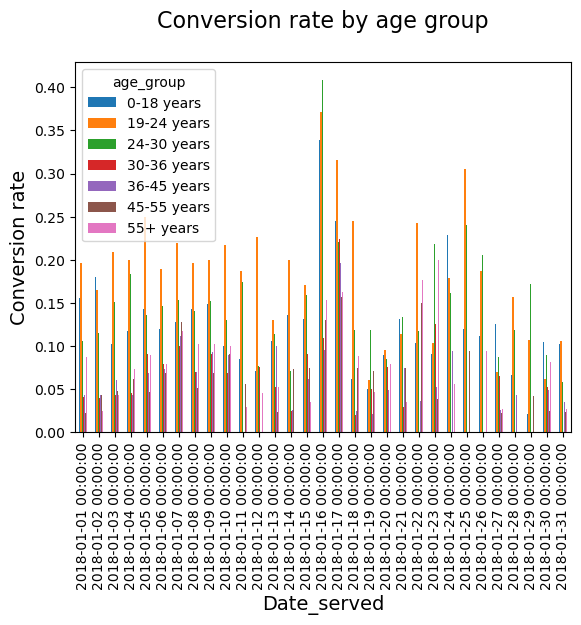

In [166]:
# Calculate conversion rate by age_group
age_group_conv = conversion_rate(marketing, ['date_served', 'age_group'])
print(age_group_conv)

# Unstack and create a DataFrame
age_group_df = pd.DataFrame(age_group_conv.unstack())

# Visualize conversion by age_group
plt.figure(figsize = (20,12))
age_group_df.plot(kind='bar')

plt.title('Conversion rate by age group\n', size = 16)
plt.ylabel('Conversion rate', size = 14)
plt.xlabel('Date_served', size = 14)
plt.show()

In [167]:
def plotting_conv(dataframe):
    for column in dataframe:
        # Plot column by dataframe's index
        plt.plot(dataframe.index,dataframe[column])
        plt.title('Daily ' + str(column) + ' conversion rate\n', 
                  size = 16)
        plt.ylabel('Conversion rate', size = 14)
        plt.xlabel('Date', size = 14)
        plt.xticks(rotation=45)
        # Show plot
        plt.show()
        plt.clf()

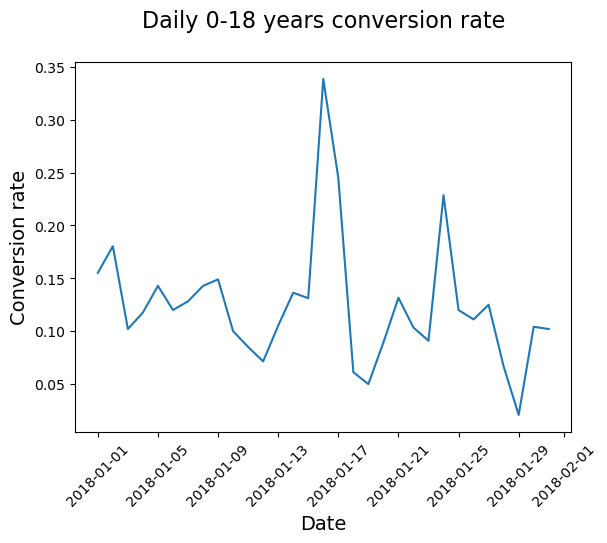

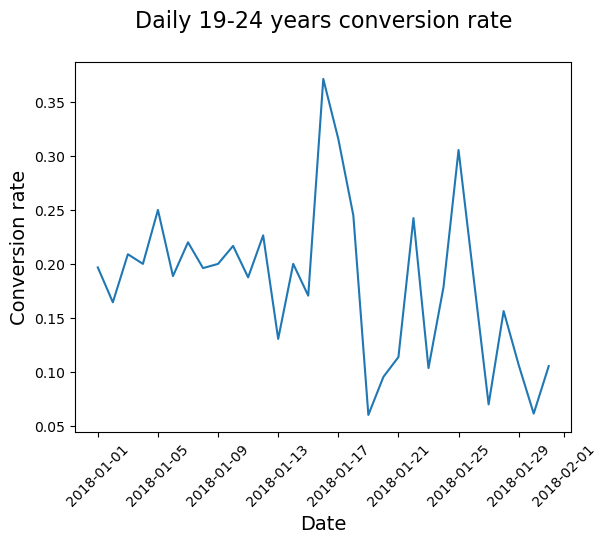

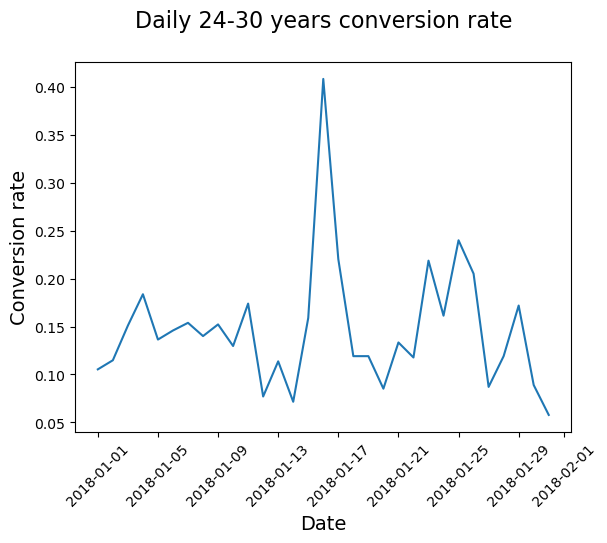

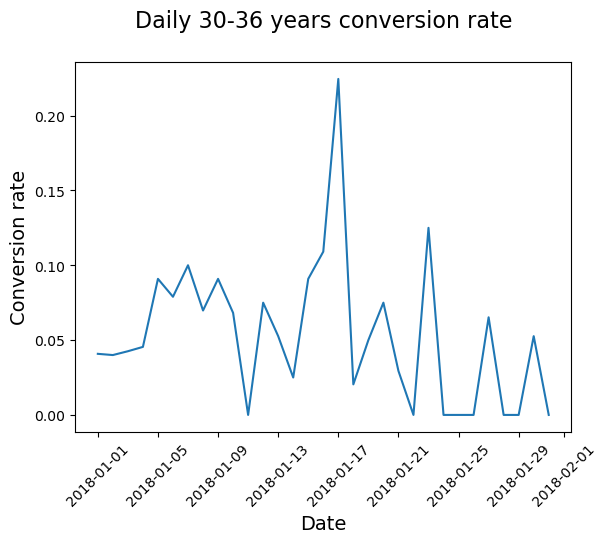

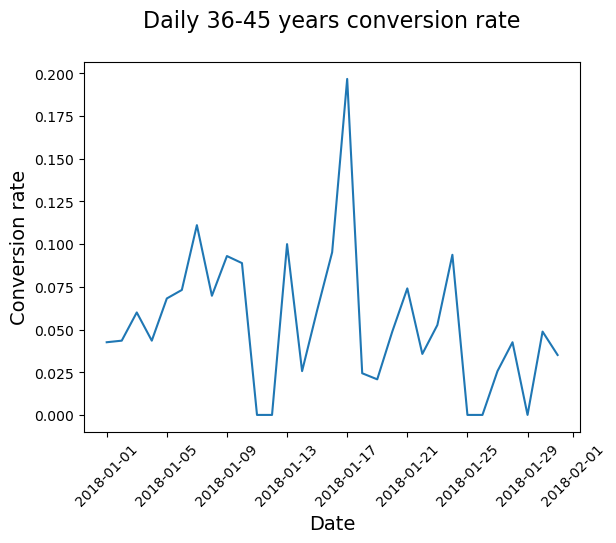

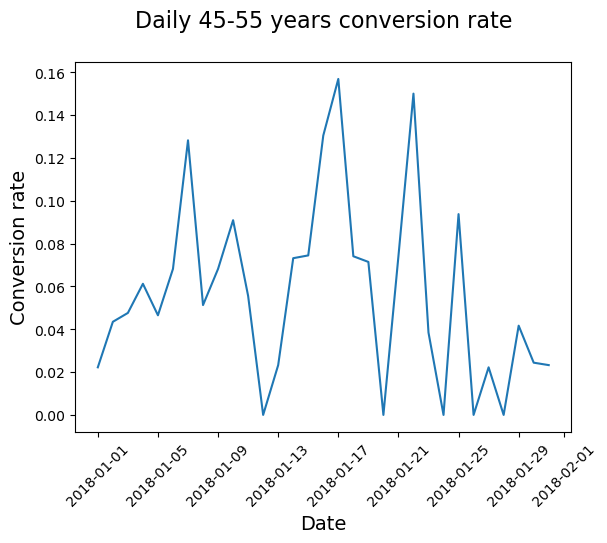

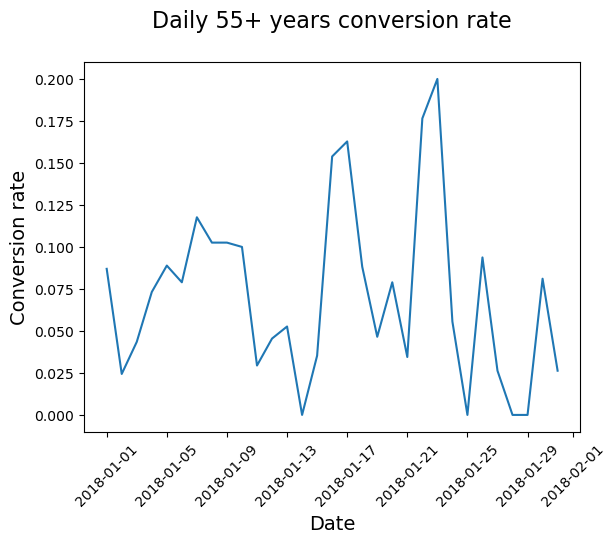

<Figure size 640x480 with 0 Axes>

In [168]:
# Calculate conversion rate by date served and age group
age_group_conv = conversion_rate(marketing, 
                                 ['date_served', 'age_group'])

# Unstack age_group_conv and create a DataFrame
age_group_df = pd.DataFrame(age_group_conv.unstack(level=1))

# Plot the results
plotting_conv(age_group_df)

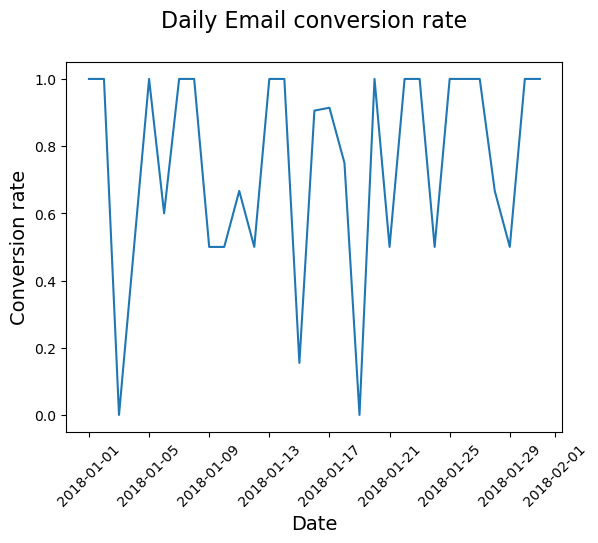

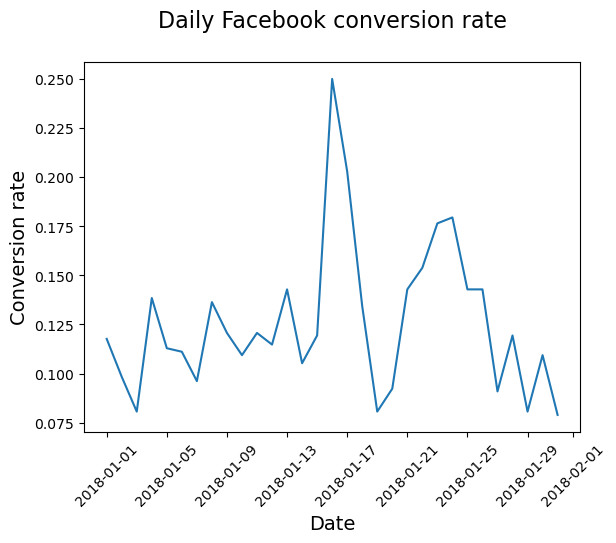

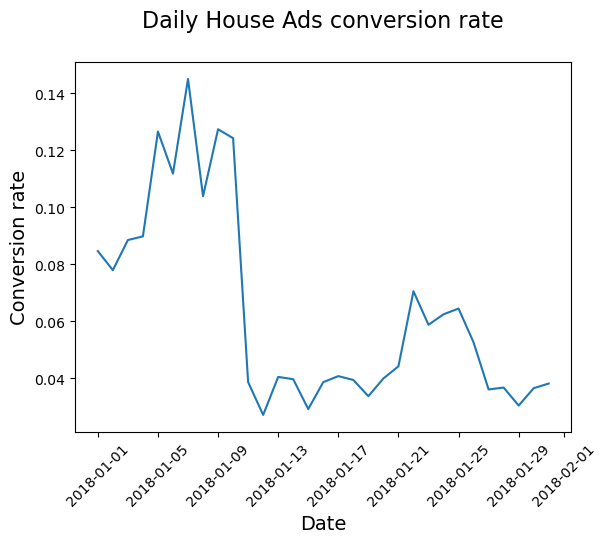

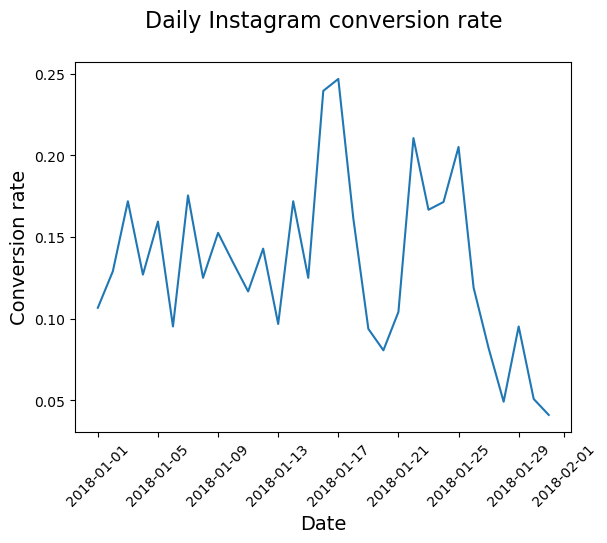

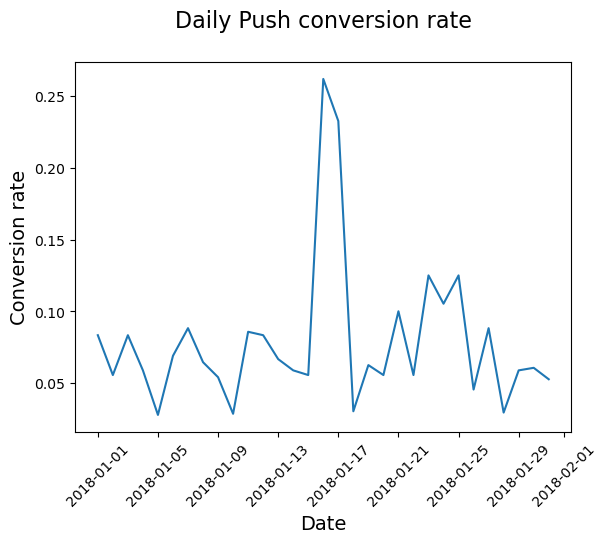

<Figure size 640x480 with 0 Axes>

In [169]:
# Calculate conversion rate by date served and channel
daily_conv_channel = conversion_rate(marketing, ['date_served', 
                                                 'marketing_channel'])

# Unstack daily_conv_channel and convert it to a DataFrame
daily_conv_channel = pd.DataFrame(daily_conv_channel.unstack(level = 1))

# Plot results of daily_conv_channel
plotting_conv(daily_conv_channel)

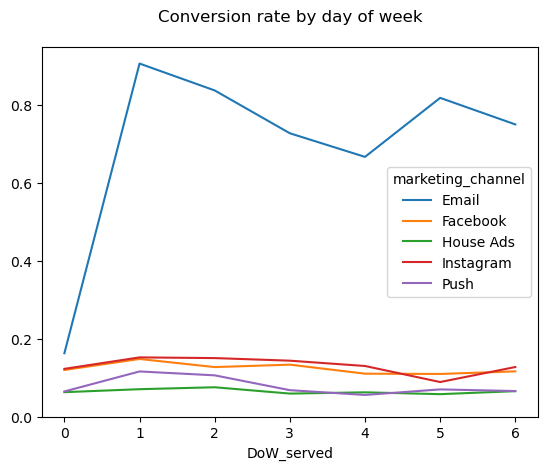

<Figure size 640x480 with 0 Axes>

In [170]:
# Add day of week column to marketing
marketing['DoW_served'] = marketing['date_served'].dt.dayofweek

# Calculate conversion rate by day of week
DoW_conversion = conversion_rate(marketing, ['DoW_served', 'marketing_channel'])


# Unstack channels
DoW_df = pd.DataFrame(DoW_conversion.unstack(level=1))

# Plot conversion rate by day of week
DoW_df.plot(kind='line')
plt.title('Conversion rate by day of week\n')
plt.ylim(0)
plt.show()
plt.clf()

In the above: Now we can see, email is particularly high and may be reflective of a tracking error, but house ads appear stable across the week with a slight peak on Tuesday. You will investigate further

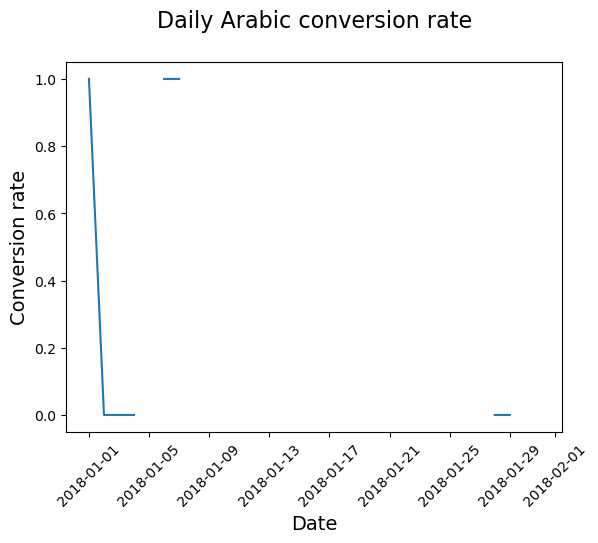

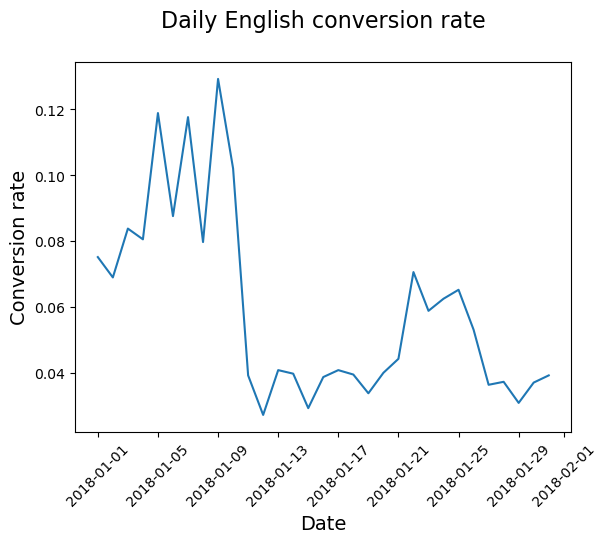

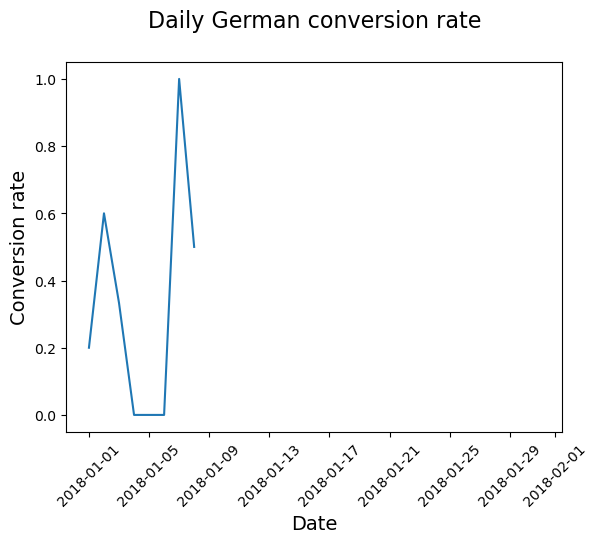

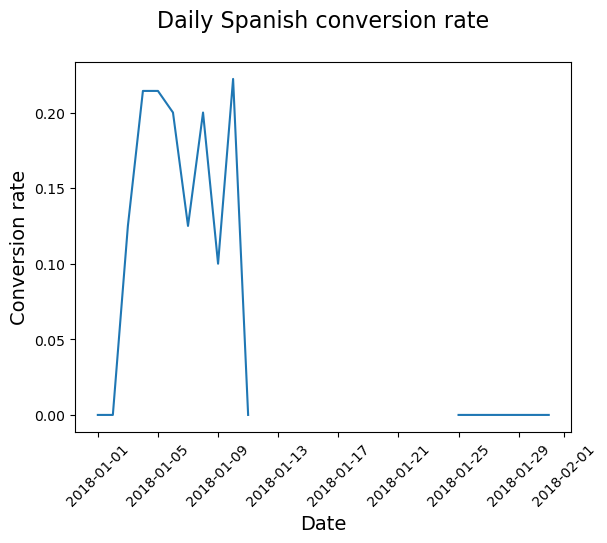

<Figure size 640x480 with 0 Axes>

In [171]:
# Isolate the rows where marketing channel is House Ads
house_ads = marketing[marketing['marketing_channel']=='House Ads']

# Calculate conversion by date served, and language displayed
conv_lang_channel = conversion_rate(house_ads,['date_served','language_displayed'])
# Unstack conv_lang_channel
conv_lang_df = pd.DataFrame(conv_lang_channel.unstack(level=1))

# Use your plotting function to display results
plotting_conv(conv_lang_df)

In the above: As you can see, the English conversion rate drops around the 11th, and there do not appear to be ads served in other languages for a two week period. We will investigate further.

In [172]:
# Add the new column is_correct_lang
house_ads['is_correct_lang'] = np.where(
    house_ads['language_displayed'] == house_ads['language_preferred'], 
    'Yes', 
    'No')

# Groupby date_served and correct_language
language_check = house_ads.groupby(['date_served','is_correct_lang'])['is_correct_lang'].count()

# Unstack language_check and fill missing values with 0's
language_check_df = pd.DataFrame(language_check.unstack(level=1)).fillna(0)

# Print results
print(language_check_df)

is_correct_lang    No    Yes
date_served                 
2018-01-01        2.0  189.0
2018-01-02        3.0  247.0
2018-01-03        0.0  220.0
2018-01-04        0.0  168.0
2018-01-05        0.0  160.0
2018-01-06        1.0  151.0
2018-01-07        2.0  130.0
2018-01-08        0.0  154.0
2018-01-09        0.0  157.0
2018-01-10        0.0  170.0
2018-01-11       20.0  135.0
2018-01-12       18.0  130.0
2018-01-13       26.0  122.0
2018-01-14       20.0  131.0
2018-01-15       16.0  192.0
2018-01-16       28.0  127.0
2018-01-17       21.0  127.0
2018-01-18       31.0  121.0
2018-01-19       22.0  127.0
2018-01-20       28.0  124.0
2018-01-21       14.0  100.0
2018-01-22       13.0   72.0
2018-01-23       16.0   69.0
2018-01-24       13.0   83.0
2018-01-25       19.0   74.0
2018-01-26       24.0   92.0
2018-01-27       18.0  149.0
2018-01-28       28.0  136.0
2018-01-29       24.0  142.0
2018-01-30       23.0  145.0
2018-01-31       23.0  135.0


C:\Users\GS\AppData\Local\Temp\ipykernel_8848\815988897.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house_ads['is_correct_lang'] = np.where(


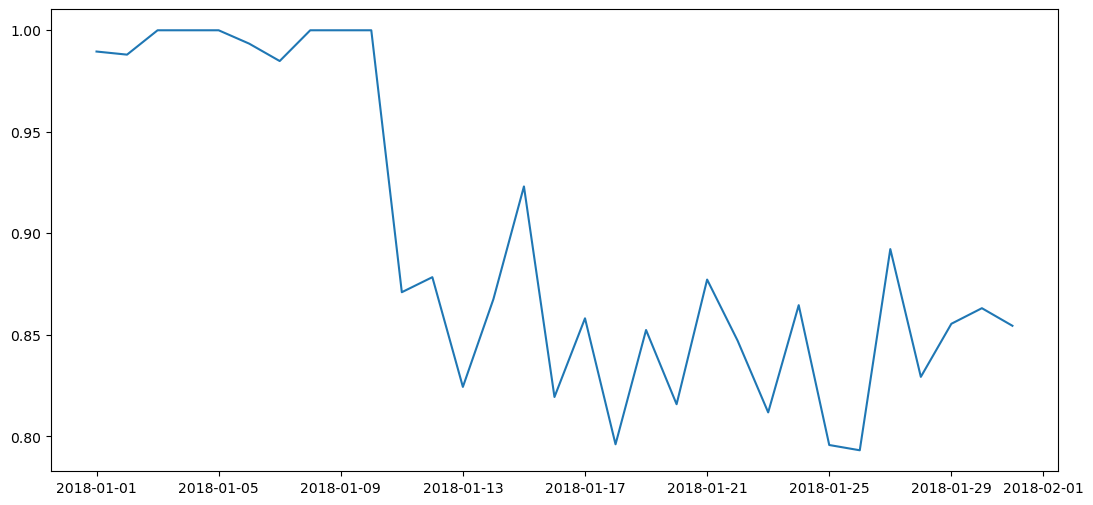

In [173]:
# Divide the count where language is correct by the row sum
language_check_df['pct'] = language_check_df['Yes']/language_check_df.sum(axis=1)

# Plot and show your results
plt.figure(figsize=(13,6))
plt.plot(language_check_df.index.values, language_check_df['pct'])
plt.show()

In the above: We have shown that house ads have been underperforming due to serving all ads in English rather than each user's preferred language

In the below: Setting up conversion indexes
Now that we have determined that language is, in fact, the issue with House Ads conversion, stakeholders need to know how many subscribers they lost as a result of this bug.
In this exercise, we will index non-English language conversion rates against English conversion rates in the time period before the language bug arose.

In [174]:
# Calculate pre-error conversion rate
house_ads_bug = house_ads[house_ads['date_served'] < '2018-01-11']
lang_conv = conversion_rate(house_ads_bug,['language_displayed'])

# Index other language conversion rate against English
spanish_index = lang_conv['Spanish']/lang_conv['English']
arabic_index = lang_conv['Arabic']/lang_conv['English']
german_index = lang_conv['German']/lang_conv['English']

print("Spanish index:", spanish_index)
print("Arabic index:", arabic_index)
print("German index:", german_index)

Spanish index: 1.681924882629108
Arabic index: 5.045774647887324
German index: 4.485133020344287


Analyzing user preferences
To understand the true impact of the bug, it is crucial to determine how many subscribers we would have expected had there been no language error. This is crucial to understanding the scale of the problem and how important it is to prevent this kind of error in the future.

In this step, we will create a new DataFrame that you can perform calculations on to determine the expected number of subscribers. This DataFrame will include how many users prefer each language by day. Once we have the DataFrame, we can begin calculating how many subscribers we would have expected to have had the language bug not occurred.

In [175]:
# Group house_ads by date and language
converted = house_ads.groupby(['date_served','language_preferred'])\
                        .agg({'user_id':'nunique',
                              'converted':'sum'})

# Unstack converted
converted_df = pd.DataFrame(converted.unstack(level = 1))

In [176]:
# Unstack converted
converted_df

user_id                        converted                 \
language_preferred  Arabic English German Spanish    Arabic English German   
date_served                                                                  
2018-01-01             2.0   171.0    5.0    11.0         2      13      1   
2018-01-02             3.0   200.0    5.0    10.0         0      14      3   
2018-01-03             2.0   179.0    3.0     8.0         0      15      1   
2018-01-04             2.0   149.0    2.0    14.0         0      12      0   
2018-01-05             NaN   143.0    1.0    14.0       NaN      17  False   
2018-01-06             3.0   136.0    2.0    11.0         3      12      0   
2018-01-07             2.0   117.0    2.0    10.0         2      14      2   
2018-01-08             NaN   138.0    6.0    10.0       NaN      11      3   
2018-01-09             NaN   147.0    NaN    10.0       NaN      19    NaN   
2018-01-10             NaN   147.0    4.0    18.0       NaN      15      2   
2018-01-11             7.0   133.0    2.0    13.0         0       6      0   
2018-01-12             3.0   129.0    4.0    11.0         0       3      0   
2018-01-13             6.0   121.0    5.0    16.0         0       5      1   
2018-01-14             5.0   131.0    3.0    12.0         0       6      0   
2018-01-15             2.0   189.0    4.0    10.0         0       6      0   
2018-01-16             7.0   127.0    4.0    17.0         0       6      0   
2018-01-17             2.0   126.0    3.0    16.0         0       2      0   
2018-01-18             7.0   121.0    6.0    18.0         0       5      1   
2018-01-19             5.0   126.0    5.0    12.0         1       4      0   
2018-01-20             6.0   124.0    6.0    14.0         1       4      1   
2018-01-21             1.0    99.0    4.0     9.0     False       5      0   
2018-01-22             2.0    72.0    3.0     8.0         1       4      1   
2018-01-23             3.0    69.0    4.0     9.0         0       5      0   
2018-01-24             2.0    83.0    3.0     8.0         0       6      0   
2018-01-25             3.0    75.0    4.0    11.0         0       4      2   
2018-01-26             6.0    89.0    3.0    16.0         0       4      0   
2018-01-27             3.0   148.0    3.0    12.0         1       4      0   
2018-01-28             5.0   134.0    3.0    21.0         0       4      0   
2018-01-29             7.0   138.0    4.0    15.0         2       3      0   
2018-01-30             4.0   139.0    3.0    18.0         0       4      0   
2018-01-31             7.0   130.0    4.0    16.0         1       4      0   

                            
language_preferred Spanish  
date_served                 
2018-01-01               0  
2018-01-02               0  
2018-01-03               1  
2018-01-04               3  
2018-01-05               3  
2018-01-06               2  
2018-01-07               1  
2018-01-08               2  
2018-01-09               1  
2018-01-10               4  
2018-01-11               0  
2018-01-12               1  
2018-01-13               0  
2018-01-14               0  
2018-01-15               0  
2018-01-16               0  
2018-01-17               4  
2018-01-18               0  
2018-01-19               0  
2018-01-20               0  
2018-01-21               0  
2018-01-22               0  
2018-01-23               0  
2018-01-24               0  
2018-01-25               0  
2018-01-26               2  
2018-01-27               1  
2018-01-28               2  
2018-01-29               0  
2018-01-30               2  
2018-01-31               1

In the below: Now, you will assess how many subscribers you lost due to the language discrepancy.

In [177]:
# Create English conversion rate column for affected period
converted_df['english_conv_rate'] = converted_df.loc['2018-01-11':'2018-01-31'][('converted','English')]
# Create expected conversion rates for each language
converted_df['expected_spanish_rate'] = converted_df['english_conv_rate']*spanish_index
converted_df['expected_arabic_rate'] = converted_df['english_conv_rate']*arabic_index
converted_df['expected_german_rate'] = converted_df['english_conv_rate']*german_index
# Calculating daily expected conversions
converted_df['expected_spanish_conversions'] = converted_df['expected_spanish_rate']/100*converted_df[('user_id','Spanish')]
converted_df['expected_arabic_conversions'] = converted_df['expected_arabic_rate']/100*converted_df[('user_id','Arabic')]
converted_df['expected_german_conversions'] = converted_df['expected_german_rate']/100*converted_df[('user_id','German')]



In [178]:
converted_df

user_id                        converted                 \
language_preferred  Arabic English German Spanish    Arabic English German   
date_served                                                                  
2018-01-01             2.0   171.0    5.0    11.0         2      13      1   
2018-01-02             3.0   200.0    5.0    10.0         0      14      3   
2018-01-03             2.0   179.0    3.0     8.0         0      15      1   
2018-01-04             2.0   149.0    2.0    14.0         0      12      0   
2018-01-05             NaN   143.0    1.0    14.0       NaN      17  False   
2018-01-06             3.0   136.0    2.0    11.0         3      12      0   
2018-01-07             2.0   117.0    2.0    10.0         2      14      2   
2018-01-08             NaN   138.0    6.0    10.0       NaN      11      3   
2018-01-09             NaN   147.0    NaN    10.0       NaN      19    NaN   
2018-01-10             NaN   147.0    4.0    18.0       NaN      15      2   
2018-01-11             7.0   133.0    2.0    13.0         0       6      0   
2018-01-12             3.0   129.0    4.0    11.0         0       3      0   
2018-01-13             6.0   121.0    5.0    16.0         0       5      1   
2018-01-14             5.0   131.0    3.0    12.0         0       6      0   
2018-01-15             2.0   189.0    4.0    10.0         0       6      0   
2018-01-16             7.0   127.0    4.0    17.0         0       6      0   
2018-01-17             2.0   126.0    3.0    16.0         0       2      0   
2018-01-18             7.0   121.0    6.0    18.0         0       5      1   
2018-01-19             5.0   126.0    5.0    12.0         1       4      0   
2018-01-20             6.0   124.0    6.0    14.0         1       4      1   
2018-01-21             1.0    99.0    4.0     9.0     False       5      0   
2018-01-22             2.0    72.0    3.0     8.0         1       4      1   
2018-01-23             3.0    69.0    4.0     9.0         0       5      0   
2018-01-24             2.0    83.0    3.0     8.0         0       6      0   
2018-01-25             3.0    75.0    4.0    11.0         0       4      2   
2018-01-26             6.0    89.0    3.0    16.0         0       4      0   
2018-01-27             3.0   148.0    3.0    12.0         1       4      0   
2018-01-28             5.0   134.0    3.0    21.0         0       4      0   
2018-01-29             7.0   138.0    4.0    15.0         2       3      0   
2018-01-30             4.0   139.0    3.0    18.0         0       4      0   
2018-01-31             7.0   130.0    4.0    16.0         1       4      0   

                           english_conv_rate expected_spanish_rate  \
language_preferred Spanish                                           
date_served                                                          
2018-01-01               0               NaN                   NaN   
2018-01-02               0               NaN                   NaN   
2018-01-03               1               NaN                   NaN   
2018-01-04               3               NaN                   NaN   
2018-01-05               3               NaN                   NaN   
2018-01-06               2               NaN                   NaN   
2018-01-07               1               NaN                   NaN   
2018-01-08               2               NaN                   NaN   
2018-01-09               1               NaN                   NaN   
2018-01-10               4               NaN                   NaN   
2018-01-11               0                 6             10.091549   
2018-01-12               1                 3              5.045775   
2018-01-13               0                 5              8.409624   
2018-01-14               0                 6             10.091549   
2018-01-15               0                 6             10.091549   
2018-01-16               0                 6             10.091549   
2018-01-17               4          

In [179]:
converted_df.loc['2018-01-11':'2018-01-31']

user_id                        converted                 \
language_preferred  Arabic English German Spanish    Arabic English German   
date_served                                                                  
2018-01-11             7.0   133.0    2.0    13.0         0       6      0   
2018-01-12             3.0   129.0    4.0    11.0         0       3      0   
2018-01-13             6.0   121.0    5.0    16.0         0       5      1   
2018-01-14             5.0   131.0    3.0    12.0         0       6      0   
2018-01-15             2.0   189.0    4.0    10.0         0       6      0   
2018-01-16             7.0   127.0    4.0    17.0         0       6      0   
2018-01-17             2.0   126.0    3.0    16.0         0       2      0   
2018-01-18             7.0   121.0    6.0    18.0         0       5      1   
2018-01-19             5.0   126.0    5.0    12.0         1       4      0   
2018-01-20             6.0   124.0    6.0    14.0         1       4      1   
2018-01-21             1.0    99.0    4.0     9.0     False       5      0   
2018-01-22             2.0    72.0    3.0     8.0         1       4      1   
2018-01-23             3.0    69.0    4.0     9.0         0       5      0   
2018-01-24             2.0    83.0    3.0     8.0         0       6      0   
2018-01-25             3.0    75.0    4.0    11.0         0       4      2   
2018-01-26             6.0    89.0    3.0    16.0         0       4      0   
2018-01-27             3.0   148.0    3.0    12.0         1       4      0   
2018-01-28             5.0   134.0    3.0    21.0         0       4      0   
2018-01-29             7.0   138.0    4.0    15.0         2       3      0   
2018-01-30             4.0   139.0    3.0    18.0         0       4      0   
2018-01-31             7.0   130.0    4.0    16.0         1       4      0   

                           english_conv_rate expected_spanish_rate  \
language_preferred Spanish                                           
date_served                                                          
2018-01-11               0                 6             10.091549   
2018-01-12               1                 3              5.045775   
2018-01-13               0                 5              8.409624   
2018-01-14               0                 6             10.091549   
2018-01-15               0                 6             10.091549   
2018-01-16               0                 6             10.091549   
2018-01-17               4                 2               3.36385   
2018-01-18               0                 5              8.409624   
2018-01-19               0                 4                6.7277   
2018-01-20               0                 4                6.7277   
2018-01-21               0                 5              8.409624   
2018-01-22               0                 4                6.7277   
2018-01-23               0                 5              8.409624   
2018-01-24               0                 6             10.091549   
2018-01-25               0                 4                6.7277   
2018-01-26               2                 4                6.7277   
2018-01-27               1                 4                6.7277   
2018-01-28               2                 4                6.7277   
2018-01-29               0                 3              5.045775   
2018-01-30               2                 4                6.7277   
2018-01-31               1                 4                6.7277   

                   expected_arabic_rate expected_german_rate  \
language_preferred                                             
date_served                                                    
2018-01-11                    30.274648            26.910798   
2018-01-12                    15.137324            13.455399   
2018-01-13                    25.228873            22.425665   
2018-01-14                    30.274648            26.910798   
2018-01-15       

In [183]:
# Use .loc to slice only the relevant dates
converted_df = converted_df.loc['2018-01-11':'2018-01-31']

# Sum expected subscribers for each language
expected_subs = converted_df['expected_spanish_conversions'].sum() + converted_df['expected_arabic_conversions'].sum() + converted_df['expected_german_conversions'].sum()

# Calculate how many subscribers we actually got
actual_subs = converted_df[('converted','Spanish')].sum() + converted_df[('converted','Arabic')].sum() + converted_df[('converted','German')].sum()

# Subtract how many subscribers we got despite the bug
lost_subs = expected_subs - actual_subs
print(lost_subs)

32.144143192488265


In the above: 32 subscribers may not seem like many, but for a small company this can be vitally important, especially when expanding to new markets.

## Test allocation
The email portion of this campaign was actually run as an A/B test. Half the emails sent out were generic upsells to your product while the other half contained personalized messaging around the users’ usage of the site.

Before you begin analyzing the results, you will check to ensure users were allocated equally to the test and control groups.

Isolate the rows of marketing where the 'marketing_channel' is 'Email' and store the results in email.
Group marketing by variant and sum the unique users and store the results in alloc.
Plot the results of alloc in a bar chart.




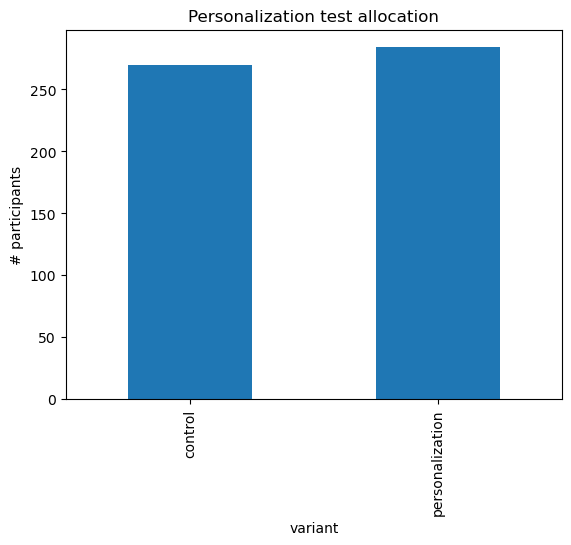

In [184]:
# Subset the DataFrame
email = marketing[marketing['marketing_channel'] == 'Email']

# Group the email DataFrame by variant 
alloc = email.groupby(['variant'])['user_id'].nunique()

# Plot a bar chart of the test allocation
alloc.plot(kind='bar')
plt.title('Personalization test allocation')
plt.ylabel('# participants')
plt.show()

In the above : There's a slight difference in allocation, but it's within the expected range so you can continue with your analysis.

### Comparing conversion rates
Now that we know allocation is relatively even let's look at the conversion rate for the control and personalization. Since we chose conversion rate as our key metrics for this test, it is highly important that we evaluate whether or not conversion was higher in the personalization treatment compared with the control. While we will dive in deeper in subsequent exercises, measuring the difference between the key metric in the control and the treatment is the most important part of evaluating the success of an A/B test.

The DataFrame email has been loaded in your workspace which contains only rows from the marketing DataFrame where marketing_channel is 'Email'.

Instructions
Group the email DataFrame by user_id and variant while selecting the maximum value of the converted column and store the results in subscribers.
Drop missing values from the control column of subscribers_df.
Drop missing values from the personalization column of subscribers_df.
Calculate the conversion rate for both personalization and control using the appropriate function for each.

In [206]:
# Group marketing by user_id and variant
subscribers = email.groupby(['user_id', 
                             'variant'])['converted'].max()
subscribers_df = pd.DataFrame(subscribers.unstack(level=1)) 

# Drop missing values from the control column
control = subscribers_df['control'].dropna()

# Drop missing values from the personalization column
personalization = subscribers_df['personalization'].dropna()


In [212]:
control.sum()

76

In [214]:
personalization.sum()

111

In the above: you can see that personalization converted users at a higher rate than the control. Next, you will build a lift function to quantify by how much.

Creating a lift function
Lift can be calculated by calculating the difference between the treatment effect (or the mean) of the treatment compared to the treatment effect of the control divided by the treatment effect of the control. The formula for lift can be found below:

 

The result is the percent difference between the control and treatment.

In this exercise, you will create a function to automate the process of calculating lift. Many marketing teams run tests constantly. The more that you can automate the parts of the process that occur within every test, the more time you will have to do more interesting analyses.

Calculate the mean of a and b using np.mean().
Use a_mean and b_mean to calculate the lift of the treatment.
Print the results of the lift() function you created using the control and personalization variables.

In [317]:
def lift(a,b):
    # Calcuate the mean of a and b 
    a_mean = np.mean(a)
    b_mean = np.mean(b)
    
    # Calculate the lift using a_mean and b_mean
    lift = (b_mean-a_mean)/a_mean
  
    return str(round(lift*100, 2)) + '%'
  
# Print lift() with control and personalization as inputs
print(lift(control, personalization))

38.85%


In the above :As you can see, there's a large lift.